<a href="https://colab.research.google.com/github/aasthagoyal46/Kaggle/blob/master/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import files

In [0]:
train_url = "https://raw.githubusercontent.com/aasthagoyal46/Kaggle/master/train_final.csv"
test_url = "https://raw.githubusercontent.com/aasthagoyal46/Kaggle/master/test_final.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [3]:
train.shape

(16383, 26)

In [4]:
train.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1


In [5]:
train.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


In [6]:
train.isnull().sum().sum()

0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 26 columns):
Id     16383 non-null int64
Y      16383 non-null int64
f1     16383 non-null int64
f2     16383 non-null int64
f3     16383 non-null float64
f4     16383 non-null int64
f5     16383 non-null int64
f6     16383 non-null int64
f7     16383 non-null int64
f8     16383 non-null int64
f9     16383 non-null int64
f10    16383 non-null int64
f11    16383 non-null int64
f12    16383 non-null int64
f13    16383 non-null int64
f14    16383 non-null float64
f15    16383 non-null int64
f16    16383 non-null int64
f17    16383 non-null int64
f18    16383 non-null int64
f19    16383 non-null int64
f20    16383 non-null int64
f21    16383 non-null int64
f22    16383 non-null int64
f23    16383 non-null int64
f24    16383 non-null int64
dtypes: float64(2), int64(24)
memory usage: 3.2 MB


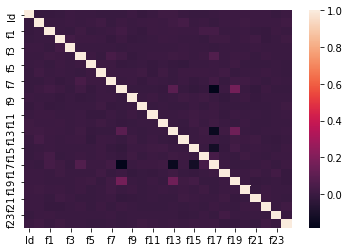

In [8]:
sns.heatmap(train.corr())

In [0]:
trainX = train.iloc[:, 2:]
trainY = train.iloc[:, 1]
testX = test.iloc[:, 1:]

In [0]:
def roc_cv(model, x, y):
  roc = cross_validate(model, x, y, scoring="roc_auc", cv = 5)
  return(roc['test_score'].mean())

In [0]:
def predictResults(name, model):
  model.fit(trainX, trainY)
  pred = model.predict_proba(testX)[:, 1]
  result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
  result.to_csv('result'+name+'.csv', index = False)
  files.download('result'+name+'.csv')

In [11]:
lr = LogisticRegression()
print("Logistic Regression CV:", roc_cv(lr, trainX, trainY))
predictResults("LR", lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression CV: 0.4961680268771126


In [16]:
dt = DecisionTreeClassifier()
print("Decision Tree Classifier CV:", roc_cv(dt, trainX, trainY))
predictResults("DT", dt)

Decision Tree Classifier CV: 0.6697723333276502


In [48]:
SVM = SVC(probability = True)
print("SVC CV:", roc_cv(SVM, trainX, trainY))
predictResults("SVC", SVM)

0.5250014049990182


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [53]:
LDA = LinearDiscriminantAnalysis()
print("Linear Discriminent Analysis CV:", roc_cv(LDA, trainX, trainY))
predictResults("LDA", LDA)

0.5388893751132682


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [56]:
QDA = QuadraticDiscriminantAnalysis()
print("Quadratic Discriminant Analysis CV:", roc_cv(QDA, trainX, trainY))
predictResults("QDA", QDA)

0.5407467847172551


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [59]:
rf = RandomForestClassifier()
print("Random Forest CV:", roc_cv(rf, trainX, trainY))
predictResults("RF", rf)

0.8555489225168526


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
KNN = KNeighborsClassifier()
print("KNN CV:", roc_cv(KNN, trainX, trainY))
predictResults("KNN", KNN)

0.6372843655768655


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
NB = GaussianNB()
print("NB CV:", roc_cv(NB, trainX, trainY))
predictResults("NB CV:", NB)

0.56185708485301


GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
XGB = XGBClassifier()
print("XGBoost CV:", roc_cv(XGB, trainX, trainY))
predictResults("XGB", XGB)

0.8442619280808291


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)